In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tratamento de valores ausentes

In [3]:
# CRIA SÉRIE DE DADOS
s = {'COL_1':[212, 434,np.nan,44,np.nan],
     'COL_2':[43, np.nan,np.nan, np.nan, np.nan],
     'COL_3':[555, 603, 102, 77, 809], 
     'COL_4':[567, 560, 614, 88, 128],
     'COL_5':[555, 603, 102, 64, np.nan]}

In [5]:
# TRANSPÕE PARA PANDAS
df = pd.DataFrame(s)

In [4]:
df.head(10)

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212.0,43.0,555,567,555.0
1,434.0,NaN,603,560,603.0
2,NaN,NaN,102,614,102.0
3,44.0,NaN,77,88,64.0
4,NaN,NaN,809,128,NaN


In [6]:
# EXCLUINDO LINHAS
df.dropna(axis=0)

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212.0,43.0,555,567,555.0


In [6]:
# EXCLUINDO COLUNAS
df.dropna(axis=1)

,COL_3,COL_4
0,555,567
1,603,560
2,102,614
3,77,88
4,809,128


In [7]:
# MANTENDO NO DF APENAS REGISTROS QUE POSSUEM PELO MENOS 4 VALORES NÃO AUSENTES
df.dropna(axis = 0, thresh=4)

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212.0,43.0,555,567,555.0
1,434.0,NaN,603,560,603.0
3,44.0,NaN,77,88,64.0


In [8]:
# SUBSTITUINDO OS AUSENTES POR 0
df.fillna(value=0)

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212.0,43.0,555,567,555.0
1,434.0,0.0,603,560,603.0
2,0.0,0.0,102,614,102.0
3,44.0,0.0,77,88,64.0
4,0.0,0.0,809,128,0.0


In [9]:
# SUBSTITUINDO OS AUSENTES POR UMA STRING
df.fillna(value='Aqui nao tem valor')

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212,43,555,567,555
1,434,Aqui nao tem valor,603,560,603
2,Aqui nao tem valor,Aqui nao tem valor,102,614,102
3,44,Aqui nao tem valor,77,88,64
4,Aqui nao tem valor,Aqui nao tem valor,809,128,Aqui nao tem valor


In [10]:
# SUBSTITUINDO OS AUSENTES PELO VALOR MÉDIO DA COLUNA
df['COL_1'] = df['COL_1'].fillna(value = df['COL_1'].mean())
df.head(10)

,COL_1,COL_2,COL_3,COL_4,COL_5
0,212.0,43.0,555,567,555.0
1,434.0,NaN,603,560,603.0
2,230.0,NaN,102,614,102.0
3,44.0,NaN,77,88,64.0
4,230.0,NaN,809,128,NaN


# Tratamento de outliers

In [11]:
pesos_alturas = pd.read_csv('PESOS_ALTURAS.csv')

In [12]:
pesos_alturas[['PESO','ALTURA']].mean()

PESO      778.674
ALTURA    203.358
dtype: float64

In [13]:
# EXTREMIDADE SUPERIOR DO PESO
pesos_alturas.sort_values(by=['PESO'], 
                          ascending=False).head(5)

,ID_PESSOA,PESO,ALTURA
758,759,701908,171
730,731,7100,169
757,758,80,169
51,52,78,169
55,56,78,170


In [14]:
# EXTREMIDADE INFERIOR DO PESO
pesos_alturas.sort_values(by=['PESO'], 
                          ascending=True).head(5)

,ID_PESSOA,PESO,ALTURA
591,592,0,169
750,751,0,170
651,652,0,171
62,63,60,170
659,660,62,170


In [15]:
# EXTREMIDADE INFERIOR DA ALTURA
pesos_alturas.sort_values(by=['ALTURA'], 
                          ascending=True).head(5)

,ID_PESSOA,PESO,ALTURA
739,740,73,1
723,724,67,15
653,654,67,17
682,683,65,163
709,710,68,164


In [16]:
# EXTREMIDADE SUPERIOR DA ALTURA
pesos_alturas.sort_values(by=['ALTURA'], 
                          ascending=False).head(5)

,ID_PESSOA,PESO,ALTURA
414,415,69,17809
436,437,68,16300
114,115,69,178
401,402,68,177
366,367,71,176


### Removendo extremidades dos dados usando quantile()

In [17]:
# REMOVENDO EXTREMIDADES DOS PESOS
pesos_alturas = pesos_alturas[
    (pesos_alturas['PESO'] > pesos_alturas['PESO'].quantile(0.005)) & 
    (pesos_alturas['PESO'] < pesos_alturas['PESO'].quantile(0.995))]

In [18]:
# DADOS PÓS REMOÇÕES
print('QTD DE REGISTROS',pesos_alturas['PESO'].count())
print('PESO MÉDIO',pesos_alturas['PESO'].mean())

QTD DE REGISTROS 986
PESO MÉDIO 69.97565922920893


In [19]:
# REMOVENDO EXTREMIDADES DE ALTURA
pesos_alturas = pesos_alturas[
    (pesos_alturas['ALTURA'] > pesos_alturas['ALTURA'].quantile(0.005)) & 
    (pesos_alturas['ALTURA'] < pesos_alturas['ALTURA'].quantile(0.995))]

In [20]:
# DADOS PÓS REMOÇÕES
print('QTD DE REGISTROS',pesos_alturas['ALTURA'].count())
print('ALTURA MÉDIA',pesos_alturas['ALTURA'].mean())

QTD DE REGISTROS 973
ALTURA MÉDIA 170.05755395683454


### Substituindo valores extremos pelo valor médio dos não extremos

In [21]:
pesos_alturas = pd.read_csv('PESOS_ALTURAS.csv')

In [22]:
# SUBSTITUINDO EXTREMIDADE SUPERIOR DO PESO
pesos_alturas['PESO'] = np.where(pesos_alturas['PESO'] >= pesos_alturas['PESO'].quantile(0.995),
                               
                                  pesos_alturas[(pesos_alturas['PESO'] > pesos_alturas['PESO'].quantile(0.005)) & 
                                                (pesos_alturas['PESO'] < pesos_alturas['PESO'].quantile(0.995))]['PESO'].mean(),
                              
                                  pesos_alturas['PESO'])

# SUBSTITUINDO EXTREMIDADE INFERIOR DO PESO
pesos_alturas['PESO'] = np.where(pesos_alturas['PESO'] <= pesos_alturas['PESO'].quantile(0.005),
                               
                                  pesos_alturas[(pesos_alturas['PESO'] > pesos_alturas['PESO'].quantile(0.005)) & 
                                                (pesos_alturas['PESO'] < pesos_alturas['PESO'].quantile(0.995))]['PESO'].mean(),
                              
                                  pesos_alturas['PESO'])

In [23]:
# DADOS PÓS SUBSTITUIÇÕES
print('QTD DE REGISTROS',pesos_alturas['PESO'].count())
print('PESO MÉDIO',pesos_alturas['PESO'].mean())

QTD DE REGISTROS 1000
PESO MÉDIO 69.97544615517141


In [24]:
# SUBSTITUINDO EXTREMIDADE SUPERIOR DA ALTURA
pesos_alturas['ALTURA'] = np.where(pesos_alturas['ALTURA'] >= pesos_alturas['ALTURA'].quantile(0.995),
                               
                                  pesos_alturas[(pesos_alturas['ALTURA'] > pesos_alturas['ALTURA'].quantile(0.005)) & 
                                                (pesos_alturas['ALTURA'] < pesos_alturas['ALTURA'].quantile(0.995))]['ALTURA'].mean(),
                              
                                  pesos_alturas['ALTURA'])

# SUBSTITUINDO EXTREMIDADE INFERIOR DA ALTURA
pesos_alturas['ALTURA'] = np.where(pesos_alturas['ALTURA'] <= pesos_alturas['ALTURA'].quantile(0.005),
                               
                                  pesos_alturas[(pesos_alturas['ALTURA'] > pesos_alturas['ALTURA'].quantile(0.005)) & 
                                                (pesos_alturas['ALTURA'] < pesos_alturas['ALTURA'].quantile(0.995))]['ALTURA'].mean(),
                              
                                  pesos_alturas['ALTURA'])

In [25]:
# DADOS PÓS SUBSTITUIÇÕES
print('QTD DE REGISTROS',pesos_alturas['ALTURA'].count())
print('ALTURA MÉDIA',pesos_alturas['ALTURA'].mean())

QTD DE REGISTROS 1000
ALTURA MÉDIA 170.0525046372068


# Discretização

### Discretização Não-supervisionada Por Divisão Igual
##### Essa técnica não trabalha bem com outliers
##### Porém, já tratamos os ouliers (acima). Nsse contexto a técnica vai funcionar bem...

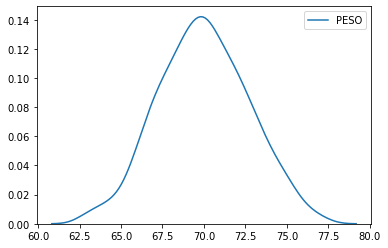

In [26]:
# VAMOS VER COMO ESTÁ AS DISTRIBUIÇÕES DOS PESOS E ALTURAS...
# OK, UMA DISTRIBUIÇÃO RELATIVAMENTE SIMÉTRICA...
sns.kdeplot(pesos_alturas['PESO'], legend=True)

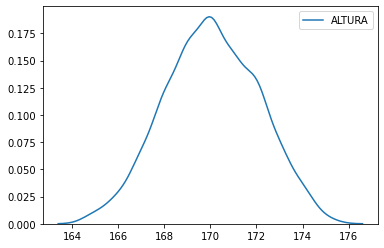

In [27]:
# VAMOS VER COMO ESTÁ AS DISTRIBUIÇÕES DAS ALTURAS...
# OK, UMA DISTRIBUIÇÃO RELATIVAMENTE SIMÉTRICA...
sns.kdeplot(pesos_alturas['ALTURA'], legend=True)

In [28]:
# PODEMOS CRIAR FUNÇÕES PARA DISCRETIZAR

# PESO
def discrPeso(x):
    if x < pesos_alturas['PESO'].quantile(0.2):
        return 'MUITO BAIXO'
    elif x < pesos_alturas['PESO'].quantile(0.4):
        return 'BAIXO'
    elif x < pesos_alturas['PESO'].quantile(0.6):
        return 'MÉDIO'
    elif x < pesos_alturas['PESO'].quantile(0.8):
        return 'ALTO'   
    else:
        return 'MUITO ALTO'

# ALTURA
def discrAltura(x):
    if x < pesos_alturas['ALTURA'].quantile(0.2):
        return 'MUITO BAIXO'
    elif x < pesos_alturas['ALTURA'].quantile(0.4):
        return 'BAIXO'
    elif x < pesos_alturas['ALTURA'].quantile(0.6):
        return 'MÉDIO'
    elif x < pesos_alturas['ALTURA'].quantile(0.8):
        return 'ALTO'   
    else:
        return 'MUITO ALTO'

In [29]:
# APLCIANDO AS FUNÇÕES...
pesos_alturas['DESC_PESO'] = pesos_alturas['PESO'].apply(discrPeso)
pesos_alturas['DESC_ALTURA'] = pesos_alturas['ALTURA'].apply(discrAltura)

In [30]:
# PRONTO! AGORA TEMOS PESOS E ALTURAS CATEGÓRICAS
pesos_alturas.head(5)

,ID_PESSOA,PESO,ALTURA,DESC_PESO,DESC_ALTURA
0,1,68.0,168.0,BAIXO,BAIXO
1,2,67.0,173.0,MUITO BAIXO,MUITO ALTO
2,3,70.0,174.0,MÉDIO,MUITO ALTO
3,4,68.0,172.0,BAIXO,MUITO ALTO
4,5,73.0,168.0,MUITO ALTO,BAIXO


# Binarização

##### Especialmente útil para simplicar uma variável de desfecho
##### Abaixo um exemplo bem simples de binarização

In [31]:
# fonte: https://www.kaggle.com/rhuebner/human-resources-data-set
dfRh = pd.read_csv('RH_DATASET.csv')
dfRh.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,...,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,...,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,Male,Single,US Citizen,No,...,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,Female,Married,US Citizen,No,...,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,...,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [32]:
# VAMOS EXAMINAR OS DEPARTAMENTOS EXISTENTES, 
# PARA VERIFICAR O QUE DEVE SER ENQUADRADO EM TI
dfRh['Department'].unique()

array(['Admin Offices', 'Executive Office', 'IT/IS', 'Production',
       'Sales', 'Software Engineering', nan], dtype=object)

In [33]:
# PODEMOS ENQUADRAR AS SEGUINTES CATEGORIAS EM TI: 
# IT/IS E Software Engineering
dfRh['IT'] = (dfRh['Department'] == 'IT/IS' ) | (dfRh['Department'] == 'Software Engineering')

In [34]:
# CONFERINDO SE A BINARIZAÇÃO ESTÁ OK...
dfRh.groupby(['IT', 'Department'])['Employee Name'].count()

IT     Department          
False  Admin Offices            10
       Executive Office          1
       Production              208
       Sales                    31
True   IT/IS                    41
       Software Engineering     10
Name: Employee Name, dtype: int64

# Codificação One-Hot

##### Parte dos algoritmos de machine learning admitem apenas campos (atributos) numéricos.
##### Porém, parte dos dados que queremos usar podem ser categóricos. Nesse contexto, podemos transforma-los usando a codificação one-hot.
##### Consiste em "binarizar" aqueles campos que estão em formato categórico, onde cada categoria do campo se transforma em um campo novo, binarizado.
##### No Python, o método get_dummies da biblioteca pandas é o mais comum para esse trabalho. No exemplo abaixo vamos aplicar sobre o estado civil.

In [35]:
pd.get_dummies(dfRh['MaritalDesc'])

,Divorced,Married,Separated,Single,widowed
0,0,1,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
297,0,1,0,0,0
298,0,0,0,1,0
299,0,0,0,1,0
300,0,0,0,1,0


##### Concatenando com o DF original e removendo o campo original

In [36]:
pd.concat([pd.get_dummies(dfRh['MaritalDesc']), dfRh], axis=1).drop(['MaritalDesc'], axis=1)

,Divorced,Married,Separated,Single,widowed,Employee Name,Employee Number,State,Zip,DOB,...,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score,IT
0,0,1,0,0,0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,...,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,False
1,1,0,0,0,0,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,...,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,False
2,0,0,0,1,0,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,...,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets,False
3,0,1,0,0,0,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,...,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review,False
4,0,0,0,1,0,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,...,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0,1,0,0,0,"Saada, Adell",1.012023e+09,MA,2132.0,7/24/1986,...,NaN,N/A - still employed,Active,Software Engineering,Software Engineer,49.25,Alex Sweetwater,Pay Per Click - Google,Fully Meets,True
298,0,0,0,1,0,"Szabo, Andrew",1.201031e+09,MA,2140.0,5/6/1983,...,NaN,N/A - still employed,Active,Software Engineering,Software Engineer,48.00,Alex Sweetwater,MBTA ads,Exceptional,True
299,0,0,0,1,0,"True, Edward",1.102024e+09,MA,2451.0,6/14/1983,...,4/15/2014,medical issues,Voluntarily Terminated,Software Engineering,Software Engineer,45.42,Alex Sweetwater,Diversity Job Fair,Fully Meets,True
300,0,0,0,1,0,"Sweetwater, Alex",1.001645e+09,MA,2184.0,11/22/1966,...,NaN,N/A - still employed,Active,Software Engineering,Software Engineering Manager,27.00,Jennifer Zamora,Search Engine - Google Bing Yahoo,Fully Meets,True


##### Definindo uma função one-hot encoding

In [37]:
def one_hot_encode(df, feature_to_one_hot):
    dummies = pd.get_dummies(df[[feature_to_one_hot]])
    new_df = pd.concat([df, dummies], axis=1)
    return(new_df.drop([feature_to_one_hot], axis=1))

In [38]:
feature_to_one_hot = ['Sex', 
                      'Employment Status', 
                      'CitizenDesc']

for feature in feature_to_one_hot:
    dfRh = one_hot_encode(dfRh, feature)

In [39]:
list(dfRh)

['Employee Name',
 'Employee Number',
 'State',
 'Zip',
 'DOB',
 'Age',
 'MaritalDesc',
 'Hispanic/Latino',
 'RaceDesc',
 'Date of Hire',
 'Date of Termination',
 'Reason For Term',
 'Department',
 'Position',
 'Pay Rate',
 'Manager Name',
 'Employee Source',
 'Performance Score',
 'IT',
 'Sex_Female',
 'Sex_Male',
 'Sex_male',
 'Employment Status_Active',
 'Employment Status_Future Start',
 'Employment Status_Leave of Absence',
 'Employment Status_Terminated for Cause',
 'Employment Status_Voluntarily Terminated',
 'CitizenDesc_Eligible NonCitizen',
 'CitizenDesc_Non-Citizen',
 'CitizenDesc_US Citizen']

# Pivotagem

##### Tarefa de pré-processamento muito comum em mineração de texto, identificação de regras de associação e sistemas de recomendação.

In [40]:
# VAMOS IMPORTAR UM DATASET PARA EXEMPLIFICAR...
dfVoos = sns.load_dataset('flights')
dfVoos.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [41]:
# USANDO A pivot_table DO PANDAS PARA TRANSPOR OS DADOS

dfVoosPivot = dfVoos.pivot_table(values = 'passengers', 
                         index = 'month', 
                         columns = 'year')
dfVoosPivot.head(50)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


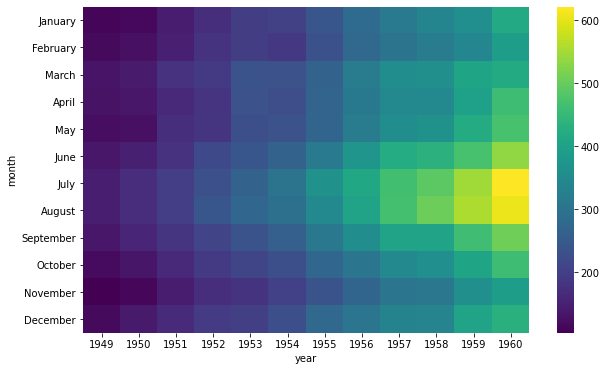

In [42]:
# MAPA DE CALOR DA TABELA PIVOTADA
plt.figure(figsize=[10,6])
sns.heatmap(dfVoosPivot, cmap='viridis')

# Pivotagem e Binarização
##### Matrizes binarizadas são muito comuns para estimar correlações
##### Vamos ver um exemplo...

In [43]:
sCompras = {'CLIENTE':['José', 'José', 'José', 'José', 'Maria', 'Maria', 'Beltrano', 'Beltrano', 'Beltrano', 'Beltrano', 'Maria José', 'Tereza', 'Tereza', 'Tereza', 'Tereza', 'Tereza', 'Michael', 'Michael', 'David', 'David', 'David', 'David', 'Carol', 'Carol', 'Eduardo', 'Eduardo', 'Eduardo', 'Eduardo', 'Fernando', 'Fernando', 'Fernando', 'Marcos', 'Marcos', 'Andreia', 'Andreia', 'Julia', 'Julia', 'Carlos', 'Carlos', 'Rubens', 'Rubens', 'Bruno', 'Bruno'],
            'PRODUTO':['camiseta', 'camisa', 'jeans', 'meia', 'gravata', 'jeans', 'camiseta', 'jeans', 'meia', 'sapato', 'gravata', 'camiseta', 'camisa', 'jeans', 'meia', 'gravata', 'camiseta', 'camisa', 'jeans', 'gravata', 'meia', 'sapato', 'sapato', 'meia', 'camiseta', 'camisa', 'jeans', 'gravata', 'sapato', 'meia', 'gravata', 'jeans', 'gravata', 'jeans', 'gravata',  'jeans', 'gravata',  'jeans', 'gravata',  'jeans', 'gravata',  'jeans', 'gravata']}

In [44]:
# TRANSPÕE PARA PANDAS
dfCompras = pd.DataFrame(sCompras)

In [45]:
# INCLUINDO A CONSTANTE 1 QUE VAMOS USAR DEPOIS
dfCompras['QTD'] = 1
dfCompras.head()

,CLIENTE,PRODUTO,QTD
0,José,camiseta,1
1,José,camisa,1
2,José,jeans,1
3,José,meia,1
4,Maria,gravata,1


In [46]:
# PRIMEIRO INCLUIMOS UM CAMPO COM A CONSTANTE 1
# ESSE CAMPO SERÁ USADO NA SUMARIZAÇÃO DA TABELA PIVOT
dfCompras['QTD'] = 1

In [47]:
# CRIANDO A TABELA PITOTADA
# O PARÂMETRO FILL_VALUE PREENCHE COM 0 AS AUSÊNCIAS
dfComprasPivot = dfCompras.pivot_table(values = 'QTD', 
                         index = 'CLIENTE', 
                         columns = 'PRODUTO',
                        fill_value = 0)
dfComprasPivot.head(50)

PRODUTO,camisa,camiseta,gravata,jeans,meia,sapato
CLIENTE,,,,,,
Andreia,0,0,1,1,0,0
Beltrano,0,1,0,1,1,1
Bruno,0,0,1,1,0,0
Carlos,0,0,1,1,0,0
Carol,0,0,0,0,1,1
David,0,0,1,1,1,1
Eduardo,1,1,1,1,0,0
Fernando,0,0,1,0,1,1
José,1,1,0,1,1,0


##### O método pd.corr() aplica a equação de Pearson para estabelecer correlações

In [48]:
corrCompras = dfComprasPivot.corr()
corrCompras

PRODUTO,camisa,camiseta,gravata,jeans,meia,sapato
PRODUTO,,,,,,
camisa,1.000000,0.856349,-0.333333,0.000000,0.149071,-0.333333
camiseta,0.856349,1.000000,-0.544949,0.077850,0.313340,-0.077850
gravata,-0.333333,-0.544949,1.000000,0.333333,-0.447214,-0.333333
jeans,0.000000,0.077850,0.333333,1.000000,-0.149071,-0.333333
meia,0.149071,0.313340,-0.447214,-0.149071,1.000000,0.745356
sapato,-0.333333,-0.077850,-0.333333,-0.333333,0.745356,1.000000


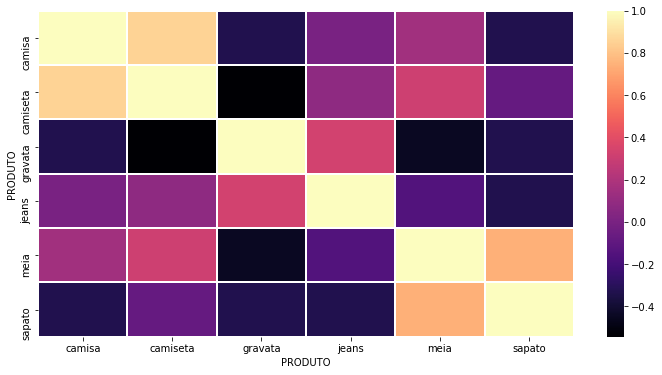

In [49]:
# GRAFICAMENTE PODE SER MAIS FÁCIL DE ANALISAR
plt.figure(figsize=[12,6])
sns.heatmap(corrCompras, cmap='magma', linecolor='w', linewidths=1)